# Chapter 14 - Classifying Images With Deep Convolutional Neural Networks

## The Building Blocks of CNNs

### Understanding CNNs and Features Hierarchies

Certain types of NNs, such as CNNs, can automatically learn the features from raw data that are most useful for a particular task. For this reason, it's common to consider CNN layers as feature extractors: the early layers (those right after the input layer) extract low-level features from raw data, and the later layers (often fully connected layers) use these features to predict a continuous target value or class label.

Certain types of NNs, and in particular deep CNNs, construct a so-called **feature hierarchy** by combining the low-level features in a layer wise fashion to form high-level features. For example, if we're dealing with images, then low-level features, such as edges and blobs, are extracted from the earlier layers, which are combined to form high-level features. These high level features can form more complex shapes, such sa the general contours of objects like buildings, cats, or dogs.

As it can be seen in the following picture, a CNN computes **feature maps** from an input image, where each element comes from a local patch of pixels in the input image:

![Alt text](../images/35.png)

This local patch of pixels is referred to as the **local receptive field**. CNNs will usually perform very welll on image-related tasks, and that's largely due to two important ideas:

- **Sparse connectivity:** A single element in the feature map is connected to only a small patch of pixels. (This is very different from connecting to the whole input image, as in the case of MLPS)

- **Parameter sharing:** The same weights are used for different patches of the input image.

As a direct consequence of these two ideas, replacing a conventional, fully connected MLP with a convolution layer substantially decreases the number of weights (parameters) in the network, and we will see an improvement in the ability to capture *salient features*. In the context of image data, it makes sense to assume that nearby pixels typically more relevant to each other than pixels that are fat away from each other.

Typically, CNNs are composed of several **convolutional** and subsampling layers that are followed by one or more fully connected layers at the end. The fully connected layers are essentially an MLP, where every input unit, i, is connected to every output unit, j, with weight wij.

Note that subsampling layers, commonly known as **pooling layers**, do not have any learnable parameters; for instance, there are no weights or bias units in pooling layers. However, both convolutional and fully connected layers haveweights and biases that are optimized during trainng

### Performing Discrete Convolutions

A **discrete convolution** (or simply **convolution**) is a fundamental operation in a CNN. Therefore, it's important to understand how this operation works. 

#### Discrete Convolutions in One Dimension

A discrete convolution for two vectors, **x** and **w**, is denoted by **y = x * w**, in which vector x is out input (sometimes called **signal**) and **w** is called the **filter** or **kernel**. A discrete convolution is mathematically defined as follows:

![Alt text](../images/36.png)

The fact that the sum runs through indices from –∞ to +∞ seems odd, mainly because in machine
learning applications, we always deal with finite feature vectors. For example, if x has 10 features with indices 0, 1, 2, ..., 8, 9, then indices –∞: –1 and 10: +∞ are out of bounds for x. Therefore, to correctly compute the summation shown in the preceding formula, it is assumed that x and w are filled with zeros. This will result in an output vector, y, that also has infinite size, with lots of zeros as well. Since this is not useful in practical situations, x is padded only with a finite number of zeros.

This process is called zero-padding or simply padding. Here, the number of zeros padded on each
side is denoted by p.

![Alt text](../images/37.png)

Let’s assume that the original input, x, and filter, w, have n and m elements, respectively, where m <= n. Therefore, the padded vector, xp, has size n + 2p. The practical formula for computing a discrete convolution will change to the following:

![Alt text](../images/38.png)

#### Padding Input to Control The Size Of The Output Feature Maps

So far, we’ve only used zero-padding in convolutions to compute finite-sized output vectors. Technically, padding can be applied with any 𝑝𝑝𝑝𝑝. Depending on the choice of p, boundary cells may be treated differently than the cells located in the middle of x.

Now, consider an example where n = 5 and m = 3. Then, with p = 0, x[0] is only used in computing one output element (for instance, y[0]), while x[1] is used in the computation of two output elements (for instance, y[0] and y[1]). So, you can see that this different treatment of elements of x can artificially put more emphasis on the middle element, x[2], since it has appeared in most computations. We can avoid this issue if we choose p = 2, in which case, each element of x will be involved in computing three elements of y.

Furthermore, the size of the output, y, also depends on the choice of the padding strategy we use. 

There are three modes of padding that are commonly used in practice: **full, same, and valid**.

In **full mode**, the padding parameter, p, is set to p = m – 1. Full padding increases the dimensions of the output; thus, it is rarely used in CNN architectures.

The same **padding mode** is usually used to ensure that the output vector has the same size as the input vector, x. In this case, the padding parameter, p, is computed according to the filter size, along with the requirement that the input size and output size are the same.

Finally, computing a convolution in **valid mode** refers to the case where p = 0 (no padding).

![Alt text](../images/39.png)

The most commonly used padding mode in CNNs is same padding. One of its advantages over the
other padding modes is that same padding preserves the size of the vector—or the height and width of the input images when we are working on image-related tasks in computer vision—which makes designing a network architecture more convenient.



## Putting Everything Together - Implementing a CNN

### Workign With MUltiple Input or Color Channels

An input to a convolutional layer may contain one or more 2D arrays or matrices with dimensions N1×N2 (for example, the image height and width in pixels). These N1×N2 matrices are called channels. Conventional implementations of convolutional layers expect a rank-3 tensor representation as an input, for example, a three-dimensional array, 𝑁1×𝑁2, where Cin is the number of input channels. For example, let’s consider images as input to the first layer of a CNN. If the image is colored and uses the RGB color mode, then Cin = 3 (for the red, green, and blue color channels in RGB). However, if the image is in grayscale, then we have Cin = 1, because there is only one channel with the grayscale pixel intensity values.

How can we incorporate multiple input channels in the convolution operation that we discussed in the previous sections? The answer is very simple: we perform the convolution operation for each channel separately and then add the results together using the matrix summation. The convolution associated with each channel (c) has its own kernel matrix as W[:, :, c].

The total pre-activation result is computed in the following formula:

![Alt text](../images/40.png)

The followign example shows a convolutional layer, followed by a pooling layer. In this example, there are three input channels. The kernel tensor is four-dimensional. Each kernel matrix is denoted as m1×m2, and there are three of them, one for each input channel. Furthermore, there are five such kernels, accounting for five output feature maps. Finally, there is a pooling layer for subsampling the feature maps:

![Alt text](../images/41.png)

Lastly, as was already mentioned, the convolution operations typically are carried out by treating an input image with multiple color channels as a stack of matrices; that is, we perform the convolution on each matrix separately and then add the results, as was illustrated in the previous figure. However, convolutions can also be extended to 3D volumes if you are working with 3D datasets

### Regularizing an NN With L2 Regularization and Dropout

Choosing the size of a network, whether we are dealing with a traditional (fully connected) NN or a CNN, has always been a challenging problem. For instance, the size of a weight matrix and the number of layers need to be tuned to achieve a reasonably good performance.

The **capacity** of a network refers to the level of complexity of the function that it can learn to approximate. Small networks, or networks with a relatively small number of parameters, have a low capacity and are therefore likely to underfit, resulting in poor performance, since they cannot learn the underlying structure of complex datasets. However, very large networks may result in overfitting, where the network will memorize the training data and do extremely well on the training dataset while achieving a poor performance on the held-out test dataset. When we deal with real-world machine learning problems, we do not know how large the network should be a priori.

One way to address this problem is to *build a network with a relatively large capacity* (in practice, we want to choose a capacity that is slightly larger than necessary) to do well on the training dataset. Then, to prevent overfitting, we can apply one or multiple regularization schemes to achieve good generalization performance on new data, such as the held-out test dataset.

L1 and L2 regularizations can prevent or reduce the effect of overfitting by adding a penalty to the loss that results in shrinking the weight parameters during training. While both can be used for NNs as well, with L2 being the more common choice of the two, there are other methods for regularizing NNs, such as dropout. But before we move on to dropout, to use L2 regularization within a convolutional or fully connected network (recall, fully connected layers are implemented via torch.nn.Linear in PyTorch), you can simply add the L2 penalty of a particular layer to the loss function in PyTorch, as follows:

In [1]:
import torch.nn as nn
import torch 

loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]), torch.tensor([1.0]))
l2_lambda = 0.001
conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=5,
                        kernel_size=5)

l2_penalty = l2_lambda * sum(
                [(p**2).sum() for p in conv_layer.parameters()]
)
loss_with_penalty = loss + l2_penalty
linear_layer = nn.Linear(10, 16)
l2_penalty = l2_lambda * sum(
                [(p**2).sum() for p in linear_layer.parameters()]
                )
loss_with_penalty = loss + l2_penalty

In recent years, dropout has emerged as a popular technique for regularizing (deep) NNs to avoid overfitting, thus improving the generalization performance.

Dropout is usually applied to the hidden units of higher layers and works as follows: during the training phase of an NN, a fraction of the hidden units is randomly dropped at every iteration with probability pdrop (or keep probability pkeep = 1 – pdrop). This dropout probability is determined by the user and the common choice is p = 0.5, as discussed in the
previously mentioned article by Nitish Srivastava and others, 2014. When dropping a certain fraction of input neurons, the weights associated with the remaining neurons are rescaled to account for the missing (dropped) neurons. The effect of this random dropout is that the network is forced to learn a redundant representation of the data. Therefore, the network cannot rely on the activation of any set of hidden units, since they may be turned off at any time during training, and is forced to learn more general and robust patterns from the data.

### Loss Functions for Classification

Depending on the type of problem, binary vs multiclass, and the type of output, logits vs probabilities, we should choose the appropiate loss function to train out model. 

**Binary cross entropy** is the loss function for a binary classification (with a single output unit), and **categorical cross-entropy** is the loss function for multiclass classification. 

![Alt text](../images/42.png)

In [2]:
####### Binary Cross-entropy
logits = torch.tensor([0.8])
probas = torch.sigmoid(logits)
target = torch.tensor([1.0])
bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()
print(f'BCE (w Probas): {bce_loss_fn(probas, target):.4f}')
print(f'BCE (w Logits): 'f'{bce_logits_loss_fn(logits, target):.4f}')

BCE (w Probas): 0.3711
BCE (w Logits): 0.3711


In [3]:
####### Categorical Cross-entropy
logits = torch.tensor([[1.5, 0.8, 2.1]])
probas = torch.softmax(logits, dim=1)
target = torch.tensor([2])
cce_loss_fn = nn.NLLLoss()
cce_logits_loss_fn = nn.CrossEntropyLoss()
print(f'CCE (w Probas): 'f'{cce_logits_loss_fn(logits, target):.4f}')
print(f'CCE (w Logits): 'f'{cce_loss_fn(torch.log(probas), target):.4f}')

CCE (w Probas): 0.5996
CCE (w Logits): 0.5996


## Implementing a Deep CNN Using Pytorch

### The Multilayer CNN Architecture

The architecture of the network that we are going to implement is shown in Figure 14.12. The inputs are 28×28 grayscale images. Considering the number of channels (which is 1 for grayscale images) and a batch of input images, the input tensor’s dimensions will be batchsize×28×28×1.

The input data goes through two convolutional layers that have a kernel size of 5×5. The first convolution has 32 output feature maps, and the second one has 64 output feature maps. Each convolution layer is followed by a subsampling layer in the form of a max-pooling operation, P2×2. Then a fully connected layer passes the output to a second fully connected layer, which acts as the final softmax output layer. 

![Alt text](../images/43.png)

The dimensions of the tensors in each layer are as follows:

- Input: [batchsize×28×28×1]
- Conv_1: [batchsize×28×28×32]
- Pooling_1: [batchsize×14×14×32]
- Conv_2: [batchsize×14×14×64]
- Pooling_2: [batchsize×7×7×64]
- FC_1: [batchsize×1024]
- FC_2 and softmax layer: [batchsize×10]

### Loading and Preprocessing the Data

In [4]:
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([
                    transforms.ToTensor()
                    ])

mnist_dataset = torchvision.datasets.MNIST(
                    root=image_path, train=True,
                    transform=transform, download=True
                    )


from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,
                            torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,
                            torch.arange(
                            10000, len(mnist_dataset)
                            ))
mnist_test_dataset = torchvision.datasets.MNIST(
                            root=image_path, train=False,
                            transform=transform, download=False
                            )

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.19MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 209kB/s]
100%|██████████| 1.65M/1.65M [00:09<00:00, 173kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.56MB/s]


In [5]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,
                    batch_size,
                    shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,
                    batch_size,
                    shuffle=False)

### Implementing a CNN Using the torch.nn Module

For implementing a CNN in PyTorch, we use the torch.nn Sequential class to stack different layers, such as convolution, pooling, and dropout, as well as the fully connected layers. The torch.nn module provides classes for each one: nn.Conv2d for a two-dimensional convolution layer; nn.MaxPool2d and nn.AvgPool2d for subsampling (max-pooling and average-pooling); and nn.Dropout for regularization using dropout.

#### Constructing a CNN in PyTorch

In [6]:
model = nn.Sequential()
model.add_module(
            'conv1',
            nn.Conv2d(
            in_channels=1, out_channels=32,
            kernel_size=5, padding=2
            )
            )
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module(
                'conv2',
                nn.Conv2d(
                in_channels=32, out_channels=64,
                kernel_size=5, padding=2
                )
                )
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [7]:
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [8]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [9]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (
            torch.argmax(pred, dim=1) == y_batch
            ).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
    
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

    print(f'Epoch {epoch+1} accuracy: 'f'{accuracy_hist_train[epoch]:.4f} val_accuracy: ' f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, \
    accuracy_hist_train, accuracy_hist_valid

In [13]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

/home/nathalie/Desktop/projects/ml-book/ml-book/lib/python3.10/site-packages/torch/autograd/graph.py:823: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 20 accuracy: 0.9983 val_accuracy: 0.9901


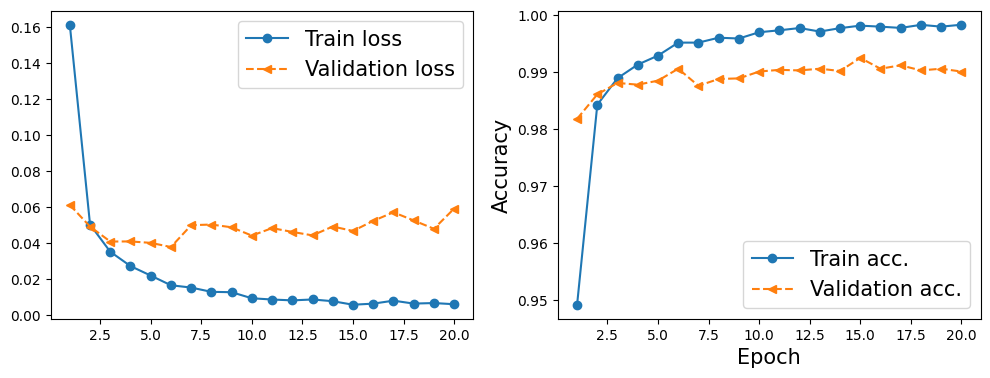

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [15]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9903


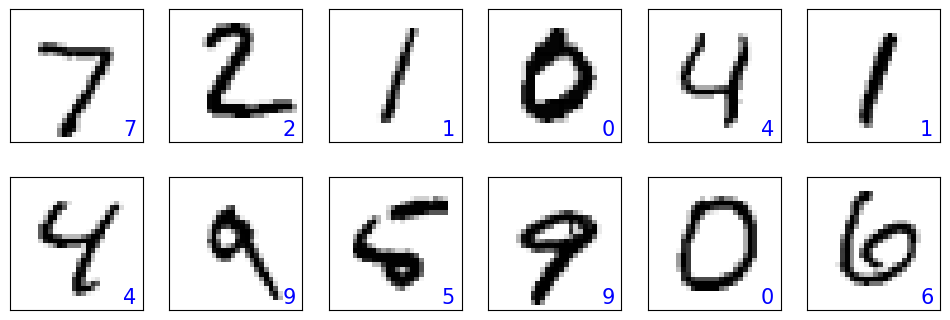

In [16]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = mnist_test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, y_pred.item(),
    size=15, color='blue',
    horizontalalignment='center',
    verticalalignment='center',
    transform=ax.transAxes)
plt.show()